In [687]:
import cv2
import os,sys,random
import numpy as np
import gzip
import time,tqdm
import matplotlib.pyplot as plt

In [681]:
def show_img(res_img):
    plt.figure(figsize=(1,1))
    plt.imshow(res_img, cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()
    
    
def read_img(path):
    img = cv2.imread(path,0) #0代表cv2.IMREAD_RRATSCALE,表示读入灰度图 1代表cv2.IMREAD_COLOR,表示读入彩色图像
    res_img =cv2.resize(img,(30,30),interpolation=cv2.INTER_CUBIC)
    return res_img

# 从文件夹里读出文件列表，然后再读取每个png的图片
def read_folder_img(folder_path):
    pathDir = os.listdir(folder_path)
    random.shuffle(pathDir)
    imgs = np.zeros((len(pathDir),30,30),dtype=np.float)
    labels = []
    for i in range(len(pathDir)) :
        s = pathDir[i].split(".")
        if s[len(s)-1] == "png":
            labels.append(pathDir[i][0])
            imgs[i] = read_img(files_path+"/"+pathDir[i])
    return imgs,labels


folder_path = "captcha-small"
imgs,labels = read_folder_img(folder_path)
imgs.shape

(10000, 30, 30)

sample image:


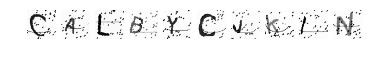

sample label: ['C', 'A', 'L', 'B', 'Y', 'C', 'J', 'K', 'I', 'N']

training size: 10000


In [683]:
print('sample image:')
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(imgs[i], cmap='Greys_r')
    plt.axis('off')
plt.show()
print('sample label: %s' % labels[0:10])
print('')
print('training size: %s' % len(imgs))

In [686]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def logistic_regression_cost_function(theta,X,y):
    m = len(y)
    sigmo = sigmoid(X * theta)
    J = 1/m * (-y.T * np.log(sigmo) - (1 - y.T) * np.log(1-sigmo))
    grad = (X.T * (sigmo - y)) / m
    return J,grad


def gradient_descent(X, y, theta, alpha, num_iters,limit_J):
    batch_size = 20
    m = np.alen(y)
    J_history = np.zeros((num_iters, 1), dtype=float)
    for i in range(num_iters):
        batch_start = 0    
        while(batch_start + batch_size < X.shape[0]):
            batch_X = X[batch_start:batch_start+batch_size,:]
            batch_y = y[batch_start:batch_start+batch_size,:] 
            J,grad = logistic_regression_cost_function(theta,batch_X,batch_y)
            J_history[i] = J
            theta = theta - alpha * grad
            batch_start += batch_size
#         if i != 0 and J_history[i] < limit_J:
#             return theta,J_history,i
    return theta,J_history,num_iters

   
def feature_normalize(X):
    rows = X.shape[1]
    for r in range(rows):
        xr = X[:, r]
        X[:, r] = (xr - np.mean(xr)) / np.std(xr)
    return X  

imgs[1].shape

(30, 30)

In [680]:
alphabet_labels = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
orgin_pixel_sum = imgs.shape[1]*imgs.shape[2]
X = np.mat(np.empty((len(imgs),orgin_pixel_sum*1),dtype=np.float))
y = np.mat(np.empty((len(labels),1),dtype=np.float))
# 把imgs打平，并做简单的升维（做一次相邻相乘）
for i in range(len(imgs)):
    imgs_dump = np.reshape(imgs[i],orgin_pixel_sum)
    imgs_dump_copy = imgs_dump
#     for j in range(len(imgs_dump_copy)):
#         imgs_dump = np.append(imgs_dump,imgs_dump_copy[j] * imgs_dump_copy[j])
#         imgs_dump = np.append(imgs_dump,imgs_dump_copy[0] * imgs_dump_copy[j])
#         imgs_dump = np.append(imgs_dump,imgs_dump_copy[1] * imgs_dump_copy[j])
#         imgs_dump = np.append(imgs_dump,imgs_dump_copy[2] * imgs_dump_copy[j])
#         imgs_dump = np.append(imgs_dump,imgs_dump_copy[3] * imgs_dump_copy[j])
#         imgs_dump = np.append(imgs_dump,imgs_dump_copy[4] * imgs_dump_copy[j])
#         imgs_dump = np.append(imgs_dump,imgs_dump_copy[5] * imgs_dump_copy[j])
#         imgs_dump = np.append(imgs_dump,imgs_dump_copy[6] * imgs_dump_copy[j])
#         imgs_dump = np.append(imgs_dump,imgs_dump_copy[7] * imgs_dump_copy[j])
#         imgs_dump = np.append(imgs_dump,imgs_dump_copy[8] * imgs_dump_copy[j])
#         imgs_dump = np.append(imgs_dump,imgs_dump_copy[9] * imgs_dump_copy[j])
    X[i] = np.reshape(imgs_dump,(1,imgs_dump.shape[0]))
    y[i] = alphabet_labels.index(labels[i]) 
print(X.shape)
print(y.shape)

(10000, 900)
(10000, 1)


In [678]:
m = X.shape[0]
val_X = X[m-2000:m,:]
train_X = X[0:m-2000,:]
val_y = y[m-2000:m,:]
train_y = y[0:m-2000,:]
# feature_normalize
val_X = feature_normalize (val_X)
train_X = feature_normalize (train_X)

val_X = np.c_[np.ones((len(val_X), 1), dtype=np.int), val_X]
train_X = np.c_[np.ones((len(train_X), 1), dtype=np.int), train_X] 
train_X.shape

(8000, 901)

In [679]:
all_theta = np.mat(np.empty((26,train_X.shape[1]),dtype=np.float))
lambd = 0.1
alpha = 0.01 # 太高时会出现 会直接跳过
iterations = 1000
limit_J = 0.001
for c in range(26):
    theta = np.mat(np.empty((train_X.shape[1],1),dtype=np.float))
    print("training :",alphabet_labels[c])
    p_theta,J_history,num_iters = gradient_descent(train_X, train_y[c,:], theta, alpha, iterations,limit_J)
    print(J_history[num_iters - 3:num_iters],"num_iters:",num_iters)
    all_theta[c,:] = p_theta.T

training : A


ValueError: could not broadcast input array from shape (26,1) into shape (1)

In [654]:
predicts = val_X * all_theta.T
count = 0
print(all_theta)
for i in range(len(predicts)):
    a = np.array(predicts[i])
    max_index = np.argmax(predicts[i])
    if val_y[i] == max_index:
        count += 1
print("Accuracy : %f, the predict ture item: %d, the predict sum：%d" % (count/len(val_X) * 100,count,len(val_X)))

[[ -1.19812781e+01  -5.53053105e-02  -1.40616826e-01 ...,  -2.26961712e-02
   -1.98982125e-01   1.96043331e-02]
 [ -1.24985746e+01   5.57150549e-02   3.43999740e-01 ...,   1.21567515e-01
    6.45133243e-02  -7.95997494e-02]
 [ -1.33106617e+01  -8.25372340e-02  -4.60027810e-01 ...,  -2.82056195e-01
    3.02372450e-02   1.20049068e-01]
 ..., 
 [ -1.28268207e+01   2.76645765e-01   1.59110942e-01 ...,  -8.49926976e-03
   -1.20619493e-01   1.46653840e-02]
 [ -1.27620110e+01   3.22885634e-02   1.31722463e-01 ...,  -2.77273308e-01
    1.83572807e-01  -2.55193374e-01]
 [ -1.21245093e+01  -9.50451525e-02  -4.94486230e-02 ...,  -1.80262521e-01
    1.82612744e-01  -1.30809942e-01]]
Accuracy : 58.150000, the predict ture item: 1163, the predict sum：2000


In [401]:
data = np.loadtxt('ex2data1.txt', delimiter=",")
X_t = data[:, 0:2]
y_t = data[:, 2]
X_t = np.c_[np.ones((X_t.shape[0], 1), dtype=np.int), X_t]
initial_theta = np.mat(np.zeros((X_t.shape[1], 1),dtype=np.float));
J,grad = logistic_regression_cost_function(initial_theta,X_t,y_t)
J

matrix([[ 0.69314718]])

In [560]:
imgs_dump = np.reshape(imgs[1],imgs.shape[1]*imgs.shape[2])
imgs_dump_copy = imgs_dump
for i in range(len(imgs_dump_copy) - 1):
    imgs_dump = np.append(imgs_dump,imgs_dump_copy[i] * imgs_dump_copy[i+1])
print(imgs_dump.shape)

(1799,)


In [628]:
np.random.randn(2)

array([-1.27475813,  0.6663122 ])

In [702]:
load_data = np.load("kc_house_data.npz")
train = load_data['train']
test = load_data['test']
train_str = ""
for i in range(train.shape[0]):
    line_str = ""
    for j in range(train.shape[1]):
        if j == train.shape[1] -1 :
            line_str = line_str + str(train[i,j])
        else:
            line_str = line_str + str(train[i,j]) + ";"
    train_str = train_str + line_str + "\n"
    
for i in range(test.shape[0]):
    line_str = ""
    for j in range(test.shape[1]):
        if j == train.shape[1] -1 :
            line_str = line_str + str(train[i,j])
        else:
            line_str = line_str + str(train[i,j]) + ";"
    train_str = train_str + line_str + "\n"

In [703]:
with open("kc_house.txt","w") as f:
    f.write(train_str)
    f.close